# Trabalho #8 - Veículo autônomo

Nesse trabalho você vai treinar uma RNA para dirigir um carro autônomo. 

Os dados de entrada consistem em imagens adquiridas por uma câmera posicionada no capô do carro e os dados de saída são comandos de direção gerados por um motorista humano. Esses dados foram obtidos usando o jogo GTA-V. A interface para esse jogo, que permite obter dados do jogo e dirigir um carro via computador, pode ser obtida em: H. Y. YAMAMOTO; G. A. M. NOVELLO. Veículo-Autônomo-GTA-V, disponível em https://github.com/henriqueyda/Veiculo-Autonomo-GTA-V.

**Importante:** Esse trabalho não tem um roteiro que deve ser seguido, portanto, você tem que utilizar os conhecimentos adquiridos no curso para resolver o problema do início ao fim.

## Coloque os nomes e RAs dos alunos que fizeram esse trabalho

Nome e número dos alunos da equipe:

Aluno 1:

Aluno 2: 

## 1. Conjunto de dados

A primeira etapa do trabalho é carregar o conjunto de dados, que consiste em um arquipo tipo zip com as imagens de entrada e as saídas desejadas, e decompactar esse arquivo em um diretório do seu Google Drive.

### Carregar arquivos de dados e descompactar para o Google Drive

Nesse trabalho você precisa do arquivo com os dados para treinamento da sua rede:

https://drive.google.com/file/d/1FLnFHDJLB2FmdHVdB18X_wMgQPSnoOCm/view?usp=sharing

Copie esse arquivo e coloque-o no seu Google Drive.

Monte o seu Google Drive para poder acessar o arquivo de dados.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Mude o diretório corrente para onde você colocou o arquivo de dados

In [2]:
%cd /content/drive/My Drive/Trabalho_veiculo_autonomo
!ls

/content/drive/My Drive/Trabalho_veiculo_autonomo
Dados_veiculo_autonomo.zip  Xtrain.npy	Ytest.npy   Yval.npy
Xtest.npy		    Xval.npy	Ytrain.npy


Execute a célula abaixo para descompactar o arquivo com os dados. Os arquivos descompactados vão estar no mesmo diretório onde se encontra o arquivo de dados comprimido. O código usa a biblioteca `os`, que possui funções do sistema operacional que fornecem acesso ao sistema de arquivos, e a biblioteca zipfile que permite descompactar arquivos.

In [0]:
import os
import zipfile

local_zip = 'Dados_veiculo_autonomo.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall()
zip_ref.close()

### Descrição dos dados

Dentro do mapa do GTA V, foi estipulada um circuito para simular o controle do veículo autônomo. O trecho escolhido possui  aproximadamente 850m e diversas condições de direção, tais como, curvas para a direita e para a esquerda, declive e aclive e um pequeno trecho com túnel, além de possuir locais onde a faixa não é bem delimitada. A paisagem observada durante o percurso contêm vegetação, árvores, morros e outros elementos vistos em algumas estradas assimilando-se à uma estrada real, mas sem a presença de outros veículos ou pedestres. A representação no mapa e uma vista aérea do circuito são representados na
figura abaixo.

<img src="circuito.png" style="width:600px;height:300px;">

Após a descompactação, os seguintes arquivos estão no diretório especificado do seu Google Drive:

1. Imagens de treinamento: Xtrain.npy
2. Imagens de validação: Xval.npy
3. Imagens de teste: Xtest.npy
4. Comandos do motorista de treinamento: Ytrain.npy
5. Comandos do motorista de validação: Yval.npy
6. Comandos do motorista de teste: Ytest.npy

Um arquivo tipo `*.npy` contém tensores numpy, portanto basta carregá-los para poder usar. Para carregar um arquivo tipo `npy` basta fazer, por exemplo:

      Xtrain = np.load ('Xtrain.npy')

As imagens tem dimensão (150, 240, 3). Os comandos do motorista são os seguintes:

1. Primeira coluna: pressão no pedal do acelerador
2. Segunda coluna: pressão no pedal do freio
3. Terceira coluna: angulo de rotação do volante
4. Velocidade do veículo.

Os valores de presão nos pedais de freio e acelerador e do ângulo do volante variam entre zero e um. Para as pressões nos pedais, zero corresponde à posição natural não pressionada. Um valor de 0,5 do ângulo do volante corresponde à posição neutra.

A taxa de aquisição dos dados é de amostras por segundo.

### Exemplo de ler e fazer gráfico das imagens e dados de saída

As células abaixo tem um exemplo de como ler os arquivos de entrada e de saída e fazer alguns gráficos. Execute essas células para visualizar os resultados.

In [3]:
# Exemplo de como ler os arquivos de dados
import numpy as np
import matplotlib.pyplot as plt

# Carrega arquivos de dados
Xval = np.load('Xval.npy')
Yval = np.load('Yval.npy')

print(Xval.shape)
print(Yval.shape)

(3772, 150, 240, 3)
(3772, 4)


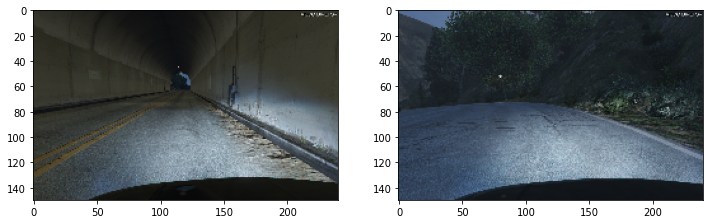

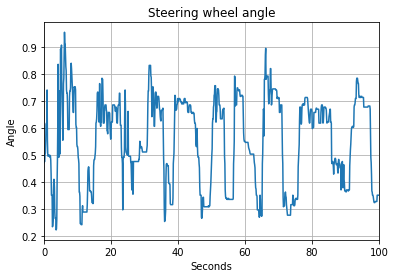

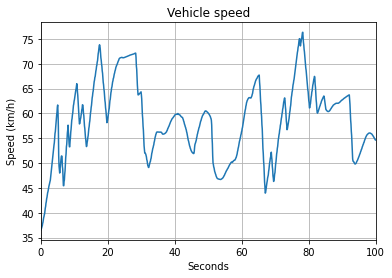

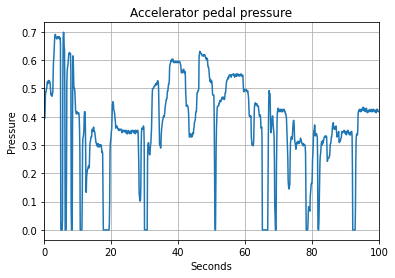

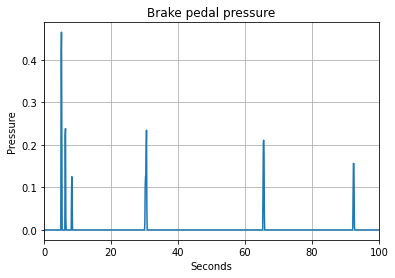

In [6]:
# Exemplo de como fazer gráfico das imagens e dados de saída

# Apresentação de algumas imagens
# Trocar o valor dos indexes para mostrar outras imagens
index1 = 1500
index2 = 2000
f, pos = plt.subplots(1, 2, figsize=(12, 16))
pos[0].imshow(Xval[index1])
pos[1].imshow(Xval[index2])
plt.show()

# Define vetor de tempo
minutos = np.arange(1000.)/10.

plt.plot(minutos, Yval[:1000,2])
plt.grid(True)
plt.xlim(0, 100)
plt.title('Steering wheel angle')
plt.xlabel('Seconds')
plt.ylabel('Angle')
plt.show()

plt.plot(minutos, Yval[:1000,3])
plt.grid(True)
plt.xlim(0, 100)
plt.title('Vehicle speed')
plt.xlabel('Seconds')
plt.ylabel('Speed (km/h)')
plt.show()

plt.plot(minutos, Yval[:1000,0])
plt.grid(True)
plt.xlim(0, 100)
plt.title('Accelerator pedal pressure')
plt.xlabel('Seconds')
plt.ylabel('Pressure')
plt.show()

plt.plot(minutos, Yval[:1000,1])
plt.grid(True)
plt.xlim(0, 100)
plt.title('Brake pedal pressure')
plt.xlabel('Seconds')
plt.ylabel('Pressure')
plt.show()


## 2. Roteiro para fazer o trabalho

Um roteiro com as etapas necessárias para fazer esse trabalho é o seguinte:

1) Visualização dos dados
  - Importante visualizar tanto os dados de entrada (imagens) como os de saída
  - Apresente do seu relatório alguns exemplos de imagens e sequencias de dados de saída

2) Processar o dados:
  - Redimensionar as imagens para reduzir o seu tamanho pela metade
  - Transformar as imagens em números reais e nomalizar dividindo por 255.
  - Embaralhar os dados para eliminar alguma tendência que pode existir (cuidado ao fazer isso, ver exemplo de código abaixo).
  - Os dados de saída (comandos do motorista) já estão entre 0 e 1, portanto não precisam ser normalizados
    
3) Definir uma configuração de RNA com camadas convolucionais e maxpooling para processar as imagens e no final camadas densas para gerar os comandos do motorista:
  - A velocidade do veículo não é possível de ser deduzida processando somente uma imagem de cada vez, então, nesse trabalho não utilize a velocidade do veículo como saída desejada
  - As saídas da sua RNA devem ser a pressão no pedal do freio, a pressão no pedal do acelerador e o ângulo do volante
  - Em razão de estar resolvendo um problema de ajuste de função, então, a função de ativação da camada de saída deve ser a linear 
  - Apresente o sumário da sua RNA no seu relatório
  - Uma possibilidade é usar uma rede convolucional pré-treinada e fazer trasnferência de treinamento
    
4) Compilar e treinar a sua RNA usando os dados de treinamento e validação
  - Use como função de custo o MSE (erro quadrático médio) e como métrica o MAE (erro absoluto médio)
  - Apresente as curvas da função de custo e da métrica resultantes do treinamento

5) Verificar o desempenho do seu motorista autônomo com os dados de teste
  - Calcular os valores da função de custo e da métrica e apresentar no seu relatório
  - Fazer um gráfico com as saídas reais e as calculadas pela sua RNA para verificar se são semelhantes e apresentar esses gráficos no seu relatório


## Dica:

A quantidade de imagens é muito grande e pode ocorrer problema de falta de memória. Para evitar esse tipo de problema, quando for transformar os tensores com as imagens (Xtrain, Xval e Xtest) não crie novas variáveis, coloque o resultado da transformação na mesma variável. Fazendo isso, os tensores originais são excluídos após o cáculo não ocupando mais memória.

## Exemplos de códigos úteis para o desenvolvimento do trabalho 

Código para embaralhar dados aleatóriamente

    N = Xval.shape[0]
    ind_list = [i for i in range(N)]
    np.random.shuffle(ind_list)
    Xval  = Xval[ind_list, :,:,:]
    Yval = Yval[ind_list,]
    
Código para fazer gráficos das imagens   
   
    index1 = 1500
    index2 = 2000
    f, pos = plt.subplots(1, 2, figsize=(12, 16))
    pos[0].imshow(Xtrain[index1])
    pos[1].imshow(Xtrain[index2])
    plt.show()
 
Nesse caso são mostradas duas imagens na mesma linha. Pode-se fazer gráficos de várias imagens usando várias linhas e colunas, para isso basta alterar os números 1 e 2 do comando `subplot` acima.
 
Código para redimensionar e normalizar imagens que estão em um tensor numpy

    import tensorflow as tf
    Xtrain = tf.image.resize(Xtrain, [75, 120], preserve_aspect_ratio=True)/255.
    Xval = tf.image.resize(Xval, [75, 120], preserve_aspect_ratio=True)/255.
    Xtest = tf.image.resize(Xtest, [75, 120], preserve_aspect_ratio=True)/255.

## 3. Uso da velocidade do veículo

Se você quiser usar a informação da velocidade do veículo, então deve usar essa informação como entrada da sua rede e não como saída. Nesse caso a RNA deve ter dois ramos:

1. Um ramo com a rede convolucional para processar as imagens
2. Um ramo para processar uma sequencia temporal de dados de velocidade. Esse ramo deve ser composto por pelo menos uma camada tipo recorrente. A sequencia de valores de velocidade deve conter alguns segundos de informação, por exemplo 3 a 5 segundos, e para isso são necessárias 30 a 50 valores de velocidade.
3. Os resultados desses dois ramos devem ser concatenados e proceesados por camadas densas para gerar a saída desejada da rede.

Essa arquitetura de rede é bastante eficiente para criar um agente autônomo capaz de dirigir um veículo.